In [14]:
# Import Modules

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, \
    classification_report, classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import svm, ensemble
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential
import sklearn

ModuleNotFoundError: No module named 'absl'

In [2]:
# READ DATA
mdata = pd.read_csv("DatabaseV4.csv")
col = ["Name" ,"C[m]","$K_{1}[\N{DEGREE SIGN}]$","$K_{2}[\N{DEGREE SIGN}]$","$\u03B3[\N{DEGREE SIGN}]$",
       "$\u03B8[\N{DEGREE SIGN}]$","$t_{max}/C$",'$X_{tmax}/C$','$X_{inf}/C$',
       '$r_{le}/C$','$r_{te}/C$', 'S[m]', '$\sigma$',
       '$\u03B2_{1}[\N{DEGREE SIGN}]$','$M_{1}$','$\u03B2_{2}[\N{DEGREE SIGN}]$',
       '$M_{2}$','Re','D','$\omega$','$C_{l}$','$P_{2}/P_{1}$','$P_{2}/P0_{1}$',
       '$V_{max}[m/s]$','$V_{2}[m/s]$','Mass Flux[kg/s]',"Decision"]
mdata.columns = col
mdata.head()

,Name,C[m],$K_{1}[°]$,$K_{2}[°]$,$γ[°]$,$θ[°]$,$t_{max}/C$,$X_{tmax}/C$,$X_{inf}/C$,$r_{le}/C$,...,Re,D,$\omega$,$C_{l}$,$P_{2}/P_{1}$,$P_{2}/P0_{1}$,$V_{max}[m/s]$,$V_{2}[m/s]$,Mass Flux[kg/s],Decision
0,Airfoil-0,0.1839,45.1465,18.4221,32.3726,26.7243,0.0718,0.4989,0.5024,0.00729,...,2423173,0.8871,0.0213,0.0943,1.1909,0.8375,374.1791,165.5544,27.9191,0
1,Airfoil-1,0.1836,45.2734,18.4806,32.4760,26.7928,0.0723,0.5032,0.5017,0.00731,...,2429301,0.9283,0.0230,0.0953,1.1999,0.8377,385.5365,165.0819,27.8475,0
2,Airfoil-1000,0.1864,45.8939,18.4398,32.4238,27.4541,0.0729,0.4961,0.5031,0.00722,...,2530614,0.7931,0.0215,0.0918,1.2421,0.8251,372.3440,172.0269,28.5064,1
3,Airfoil-1001,0.1859,45.1613,18.4116,32.3619,26.7497,0.0731,0.5014,0.4994,0.00722,...,2587477,0.8197,0.0260,0.0878,1.3113,0.8090,403.2452,179.2827,29.3262,1
4,Airfoil-1002,0.1865,45.8858,18.4425,32.4962,27.4433,0.0728,0.5015,0.4971,0.00731,...,2557191,0.7988,0.0221,0.0910,1.2643,0.8193,382.3922,174.9538,29.0836,1


In [3]:
# DROP USELESS COLUMNS
USELESS_COL = ["Name"]
mdata.drop(USELESS_COL, axis=1, inplace=True)
col = mdata.columns
mdata.head()

,C[m],$K_{1}[°]$,$K_{2}[°]$,$γ[°]$,$θ[°]$,$t_{max}/C$,$X_{tmax}/C$,$X_{inf}/C$,$r_{le}/C$,$r_{te}/C$,...,Re,D,$\omega$,$C_{l}$,$P_{2}/P_{1}$,$P_{2}/P0_{1}$,$V_{max}[m/s]$,$V_{2}[m/s]$,Mass Flux[kg/s],Decision
0,0.1839,45.1465,18.4221,32.3726,26.7243,0.0718,0.4989,0.5024,0.00729,0.00719,...,2423173,0.8871,0.0213,0.0943,1.1909,0.8375,374.1791,165.5544,27.9191,0
1,0.1836,45.2734,18.4806,32.4760,26.7928,0.0723,0.5032,0.5017,0.00731,0.00722,...,2429301,0.9283,0.0230,0.0953,1.1999,0.8377,385.5365,165.0819,27.8475,0
2,0.1864,45.8939,18.4398,32.4238,27.4541,0.0729,0.4961,0.5031,0.00722,0.00718,...,2530614,0.7931,0.0215,0.0918,1.2421,0.8251,372.3440,172.0269,28.5064,1
3,0.1859,45.1613,18.4116,32.3619,26.7497,0.0731,0.5014,0.4994,0.00722,0.00726,...,2587477,0.8197,0.0260,0.0878,1.3113,0.8090,403.2452,179.2827,29.3262,1
4,0.1865,45.8858,18.4425,32.4962,27.4433,0.0728,0.5015,0.4971,0.00731,0.00722,...,2557191,0.7988,0.0221,0.0910,1.2643,0.8193,382.3922,174.9538,29.0836,1


<AxesSubplot:>

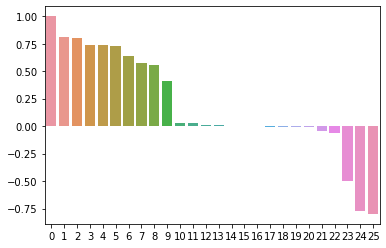

In [4]:
# MAKE CORRELATION
SA = mdata.corr()["$\omega$"].sort_values(ascending = False)
c = pd.DataFrame(SA.values)
sns.barplot(data = c.T)

In [5]:
#FEATURE SELECTION
TAR =mdata["Decision"]
VAR = mdata.loc[:, ~mdata.columns.isin(['Decision','$\omega$'])]
from sklearn.feature_selection import SelectKBest, f_classif
print("Data shape Before feature selection:")
print(VAR.shape)
FS = SelectKBest(score_func=f_classif, k=20)
VAR2 = FS.fit_transform(VAR, TAR)
print("Data shape After feature selection:")
print(VAR2.shape)

Data shape Before feature selection:
(3500, 24)
Data shape After feature selection:
(3500, 20)


In [6]:
import umap.umap_ as umap
# DIMENSIONALITY REDUCTION
def DimRed_PCA(var,comp,tar):
    pca = PCA(n_components=comp)
    pca_result = pca.fit_transform( var)
    if comp == 3:
        ax = plt.figure(figsize=(16,10),dpi = 100).gca(projection='3d')
        ax.scatter(
            xs=pca_result[:,0],
            ys=pca_result[:,1],
            zs=pca_result[:,2],
            c = tar,
            s = 20,
            cmap='tab10'
        )
        ax.set_xlabel('PCA0-one')
        ax.set_ylabel('PCA1-two')
        ax.set_zlabel('PCA2-three')
        # data = pd.DataFrame(pca_result)
        # data["tar"] = tar
        # print(data)
        # data.columns = ["pca0","pca1","pca2","tar"]
        # sns.scatterplot(
        # data=data, x="pca0", y="pca1", hue="tar", size="tar",
        # sizes=(20, 200), hue_norm=(0, 7), legend="full")
    elif comp ==2:
        plt.figure(figsize=(16,10),dpi = 100)
        plt.scatter(pca_result[:,0], pca_result[:,1], c=tar,alpha=0.5)
    plt.show()
    return pca_result
def DimRed_tSNE(var,comp,tar):
    # tSNE
    tSNE_result = TSNE(n_components=comp, learning_rate='auto',
          init='random', perplexity=3).fit_transform(var)
    if comp == 3:
        ax = plt.figure(figsize=(16,10),dpi = 100).gca(projection='3d')
        ax.scatter(
            xs=tSNE_result[:,0],
            ys=tSNE_result[:,1],
            zs=tSNE_result[:,2],
            c=tar,
            cmap='tab10'
        )
        ax.set_xlabel('pca-one')
        ax.set_ylabel('pca-two')
        ax.set_zlabel('pca-three')
    else:
        plt.figure(figsize=(16,10),dpi = 100)
        plt.scatter(tSNE_result[:,0], tSNE_result[:,1], c=tar,alpha=0.5)
    plt.show()

    return tSNE_result
def MyUmap(var, comp, tar):
    UMAP_result = umap.UMAP(n_neighbors=comp, random_state=42).fit_transform(var)
    # # umap.plot.connectivity(UMAP_result)
    if comp == 3:
        ax = plt.figure(figsize=(16,10),dpi = 100).gca(projection='3d')
        ax.scatter(
            xs=UMAP_result[:,0],
            ys=UMAP_result[:,1],
            zs=UMAP_result[:,2],
            c=tar,
            cmap='tab10'
        )
        ax.set_xlabel('pca-one')
        ax.set_ylabel('pca-two')
        ax.set_zlabel('pca-three')
    else:
        plt.figure(figsize=(16,10),dpi = 100)
        plt.scatter(UMAP_result[:,0], UMAP_result[:,1], c=tar,alpha=0.5)
    plt.show()
    return UMAP_result

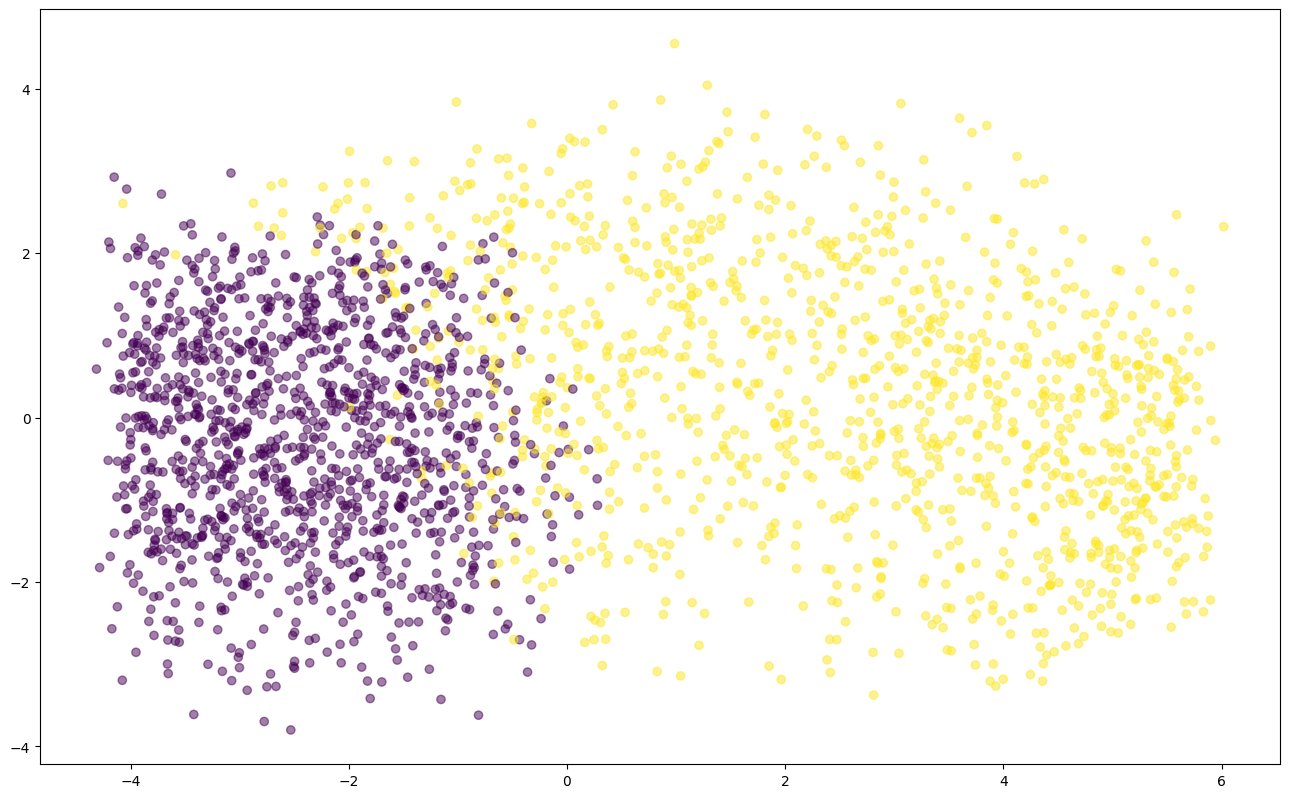

In [7]:
x = VAR2
y = TAR.values

y=np.reshape(y,(len(y),))
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.70,
                                                    random_state=0)
SCALER = StandardScaler()
x_train_scaled = SCALER.fit_transform(x_train)
x_test_scaled = SCALER.fit_transform(x_test)
# myumap = MyUmap(x_train_scaled,2,y_train)
pca = DimRed_PCA(x_train_scaled,2,y_train)

In [8]:
x = pca
y = y_train
# CLASSIFICATION
estimators = [svm.SVC(),
              ensemble.RandomForestClassifier(),
              KNeighborsClassifier(), SGDClassifier(),LogisticRegression()]

for esti in estimators:
    y_pred = cross_val_predict(esti,x,y,cv=3)
    print(f"\nClassification Report for {esti}:")
    print("Accuracy= ", accuracy_score(y_pred, y))
    print(confusion_matrix(y_pred, y))
    print(classification_report(y_pred,y))


Classification Report for SVC():
Accuracy=  0.9493877551020408
[[1196   83]
 [  41 1130]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1279
           1       0.93      0.96      0.95      1171

    accuracy                           0.95      2450
   macro avg       0.95      0.95      0.95      2450
weighted avg       0.95      0.95      0.95      2450


Classification Report for RandomForestClassifier():
Accuracy=  0.9408163265306122
[[1181   89]
 [  56 1124]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1270
           1       0.93      0.95      0.94      1180

    accuracy                           0.94      2450
   macro avg       0.94      0.94      0.94      2450
weighted avg       0.94      0.94      0.94      2450


Classification Report for KNeighborsClassifier():
Accuracy=  0.943265306122449
[[1188   90]
 [  49 1123]]
              precision    recall  f1-

In [9]:
x = pca
y = y_train
kernel=['rbf','sigmoid']
C= [1,5,10]
gamma = ['scale', 'auto']
distributions = {
    "kernel": kernel,
    "C": C,
    "gamma" : gamma,
}
iestimator = RandomizedSearchCV(
    svm.SVC(),
    param_distributions=distributions,
    n_iter = 40
)
iestimator_dict = iestimator.fit(x,y)
best_config= iestimator_dict.best_estimator_
best_y_pred = cross_val_predict(best_config, x,y, cv=3)
print("Accuracy= ", accuracy_score(best_y_pred, y))
print(confusion_matrix(best_y_pred, y))
print(classification_report(best_y_pred,y))

C:\Users\Zeinalzadeh.Aghil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 12 is smaller than n_iter=40. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy=  0.9497959183673469
[[1196   82]
 [  41 1131]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1278
           1       0.93      0.97      0.95      1172

    accuracy                           0.95      2450
   macro avg       0.95      0.95      0.95      2450
weighted avg       0.95      0.95      0.95      2450



In [10]:
x = pca
y = y_train
y_pred_test = cross_val_predict(best_config, x,y, cv=3)
print("Accuracy= ", accuracy_score(y_pred_test, y))
print(confusion_matrix(y_pred_test, y))
print(classification_report(y_pred_test,y))

Accuracy=  0.9497959183673469
[[1196   82]
 [  41 1131]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1278
           1       0.93      0.97      0.95      1172

    accuracy                           0.95      2450
   macro avg       0.95      0.95      0.95      2450
weighted avg       0.95      0.95      0.95      2450



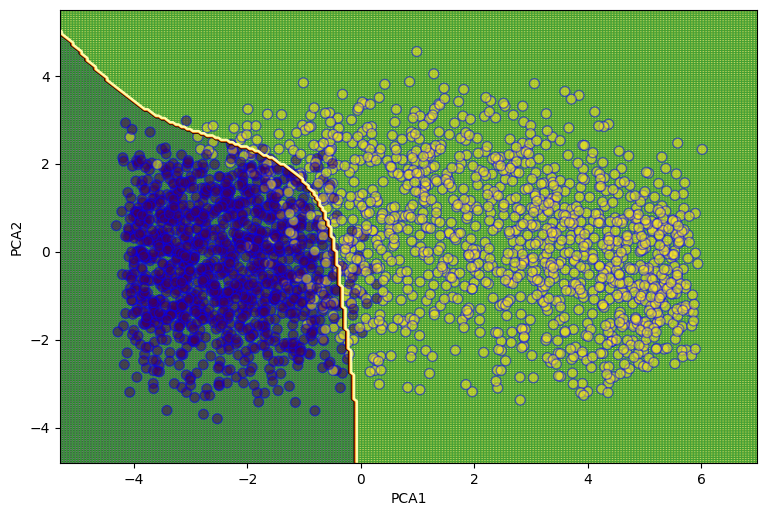

In [11]:
# pca.inverse_transform
# plt.figure(dpi=300)
x = pca
y = y_train

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

A = np.arange(x_min, x_max, 0.05)
B = np.arange(y_min, y_max, 0.05)

xx1, xx2 = np.meshgrid(A, B)
z_predict = best_config.predict(np.c_[xx1.ravel(), xx2.ravel()])
z_predict = z_predict.reshape(xx1.shape)
# #
plt.figure(figsize=(9, 6), dpi=100)
plt.contour(xx1, xx2, z_predict, cmap="afmhot", alpha=0.9)
plt.scatter(xx1, xx2, c=z_predict, s=3, alpha=0.5, edgecolors='g')
plt.scatter(pca[:,0], pca[:,1], c=y, s=50, alpha=0.5,
            edgecolors='b')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.savefig("PCA_Classification.jpg", dpi=200)
plt.show()

# 





Data shape Before feature selection:
(3500, 24)


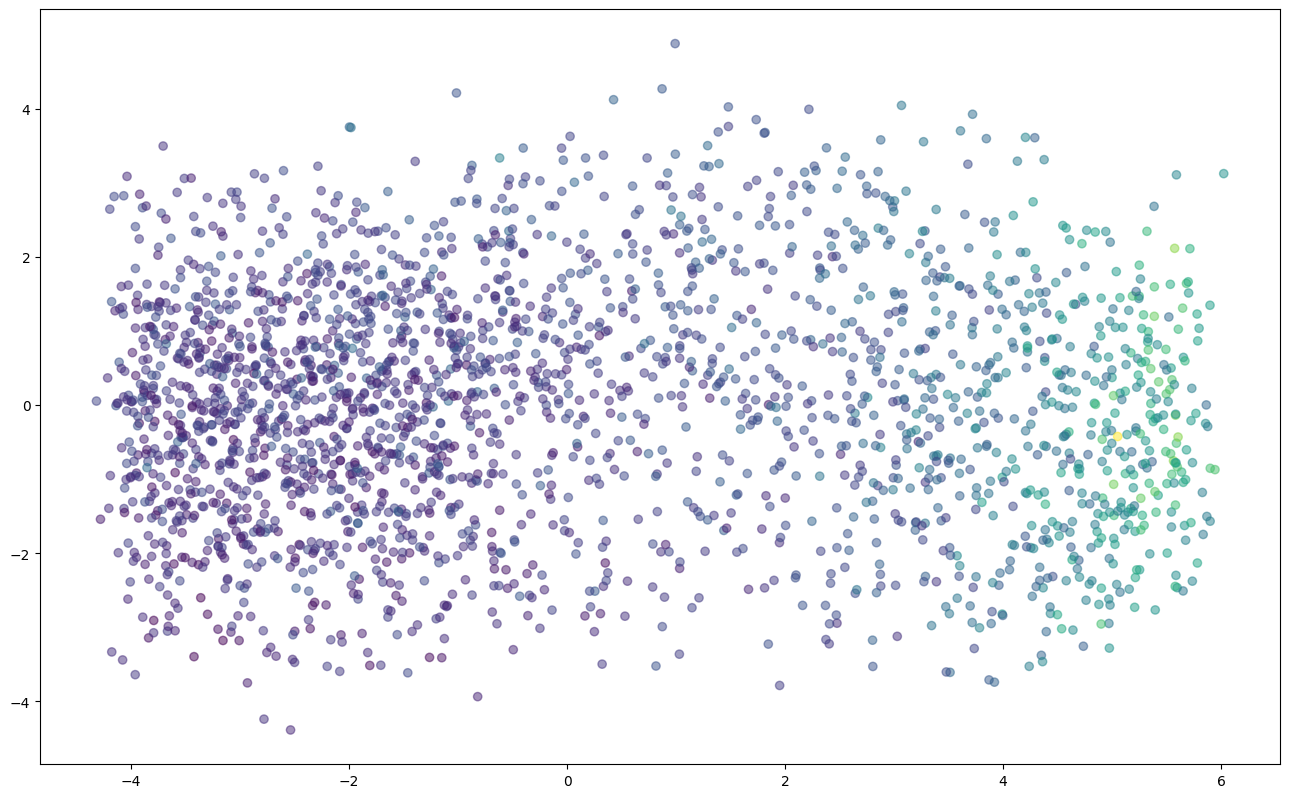

ModuleNotFoundError: No module named 'absl'

In [13]:
TAR =mdata["$\omega$"]
VAR = mdata.loc[:, ~mdata.columns.isin(['Decision','$\omega$'])]
from sklearn.feature_selection import SelectKBest, f_classif
print("Data shape Before feature selection:")
print(VAR.shape)
FS = SelectKBest(score_func=f_classif, k=20)
VAR2 = FS.fit_transform(VAR, TAR)
x = VAR2
y = TAR.values
y=np.reshape(y,(len(y),))
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size=0.70,
                                                    random_state=0)
SCALER = StandardScaler()
x_train_scaled = SCALER.fit_transform(x_train)
x_test_scaled = SCALER.fit_transform(x_test)
# myumap = MyUmap(x_train_scaled,2,y_train)
pca = DimRed_PCA(x_train_scaled,2,y_train)
x = pca
y = y_train

f1model = Sequential()
f1model.add(Dense(np.shape(x)[1], activation='linear', input_shape=(np.shape(x)[1],)))                   # The Input Layer

f1model.add(Dense(np.shape(x)[1], activation='linear'))
f1model.add(Dense(1, activation='sigmoid'))                                      # The hidden Layers
# f1model.add(Dense(1, activation='linear'))
f1model.add(Dropout(0.02))# The Output Layers
f1model.summary( )
f1model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])